In [1]:
import yaml

In [2]:
from modules.pandas_module import *
from modules.polars_module import *
from modules.utils import *

In [3]:
with open('settings.yaml', 'r') as stream:
    parameters = yaml.safe_load(stream)

# Time metrics ⌚

In [4]:
lazy_execution_time = 0.0
eager_execution_time = 0.0
pandas_execution_time = 0.0

***

# Load datasets

## Pandas 🐼

In [5]:
listing_dataset_pd, read_csv_time = pd_read_csv(parameters['listings_path'])
pandas_execution_time += read_csv_time

[Pandas] Elapsed time to read csv: 0.9524600505828857s


In [6]:
review_dataset_pd, read_csv_time = pd_read_csv(parameters['reviews_path'])
pandas_execution_time += read_csv_time

[Pandas] Elapsed time to read csv: 3.4979422092437744s


In [7]:
print(listing_dataset_pd.shape)
print(review_dataset_pd.shape)

(41533, 75)
(1088372, 6)


## Polars 🐻‍❄️

### Eager execution 🏃

In [8]:
listing_dataset_pl, read_csv_time = read_csv(parameters['listings_path'])
eager_execution_time += read_csv_time

[Polars] Elapsed time to read csv (eager execution) 0.18752694129943848s


In [9]:
review_dataset_pl, read_csv_time = read_csv(parameters['reviews_path'])
eager_execution_time += read_csv_time

[Polars] Elapsed time to read csv (eager execution) 0.5698461532592773s


### Lazy execution 🦥

In [10]:
listing_dataset_pl_lazy, scan_csv_time = scan_csv(parameters['listings_path'])
lazy_execution_time += scan_csv_time

[Polars] Elapsed time to scan dataframe: 0.0012247562408447266s


In [11]:
review_dataset_pl_lazy, scan_csv_time = scan_csv(parameters['reviews_path'])
lazy_execution_time += scan_csv_time

[Polars] Elapsed time to scan dataframe: 0.00028896331787109375s


***

# Filters

## Pandas 🐼

In [12]:
listing_dataset_pd, filter_time = pd_filter_dataset(listing_dataset_pd, parameters['desirable_neighboors'])
pandas_execution_time += filter_time

[Pandas] Elapsed time to filter csv: 0.010720014572143555s


## Polars 🐻‍❄️

### Eager execution 🏃

In [13]:
listing_dataset_pl, filter_time = filter_dataset_eager(listing_dataset_pl,desirable_neighboors = parameters['desirable_neighboors'])
eager_execution_time += filter_time

[Polars] Elapsed time to perform filters (eager execution): 0.004805803298950195


### Lazy execution 🦥

In [14]:
listing_dataset_pl_lazy, filter_time = filter_dataset(lazy_loaded_dataframe = listing_dataset_pl_lazy, desirable_neighboors = parameters['desirable_neighboors'])
lazy_execution_time += filter_time

[Polars] Elapsed time to filter dataset (lazy execution): 6.175041198730469e-05s


***

# Sort

## Pandas 🐼

In [15]:
listing_dataset_pd, sort_time = sort_by_column(dataset = listing_dataset_pd, column_name = parameters['sort_column_name'])
pandas_execution_time += sort_time

[Pandas] Elapsed time to sort dataframe: 0.0008461475372314453s


## Polars 🐻‍❄️

### Eager execution 🏃

In [16]:
listing_dataset_pl, sort_time = sort_by_column_value_eager(listing_dataset_pl, column_name = parameters['sort_column_name'])
eager_execution_time += sort_time

[Polars] Elapsed time to perform sorting (eager execution): 0.0020918846130371094s


### Lazy execution 🦥

In [17]:
listing_dataset_pl_lazy, sort_time = sort_by_column_value_lazy(listing_dataset_pl_lazy, column_name = parameters['sort_column_name'])
lazy_execution_time += sort_time

[Polars] Elapsed time to perform sorting (lazy execution): 1.7881393432617188e-05s


# Remove columns 🆑

## Pandas 🐼

In [18]:
remove_time = remove_unwanted_columns(listing_dataset_pd, parameters['columns_to_remove'])
pandas_execution_time += remove_time

[Pandas] Elapsed time to remove columns: 0.0028269290924072266s


## Polars 🐻‍❄️

### Eager execution 🏃

In [19]:
remove_time = remove_unused_columns_eager(listing_dataset_pl, parameters['columns_to_remove'])
eager_execution_time += remove_time

[Polars] Elapsed time to drop 6 (eager execution) 3.1948089599609375e-05s


### Lazy execution 🦥

In [20]:
listing_dataset_pl_lazy, remove_time = drop_unwanted_columns_lazy(listing_dataset_pl_lazy, columns = parameters['columns_to_remove'])
lazy_execution_time += remove_time

[Polars] Elapsed time to drop 6 columns (lazy execution): 1.9788742065429688e-05s


***

# Join

## Pandas 🐼

In [21]:
joined_datasets_pd, join_time = join_datasets(first_dataset = listing_dataset_pd, second_dataset = review_dataset_pd, joining_column_name = 'listing_id')
pandas_execution_time += join_time

[Pandas] Elapsed time to join datasets: 0.03500485420227051s


## Polars 🐻‍❄️

### Eager execution 🏃

In [22]:
listing_dataset_pl, add_column_time  = add_column_eager(listing_dataset_pl)
eager_execution_time += add_column_time

[Polars] Elapsed time to add column (eager execution): 0.0014319419860839844s


In [23]:
joined_polars, join_time = join_datasets_eager(listing_dataset_pl, review_dataset_pl, parameters['matching_column'])
eager_execution_time += join_time

[Polars] Elapsed time to perform join (eager execution): 0.03319072723388672s


###  Lazy Execution 🦥

#### Disclaimer: to perform this section, the lazy track has to be **collected**. It means that all above methods have been stacked so far to be first optimized before its execution.

Moreover, the eager track does not need to be collected, because it has been executed all methods so far.

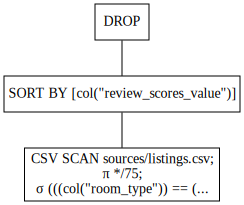

In [24]:
listing_dataset_pl_lazy.show_graph()

In [25]:
listing_dataset_pl_lazy_collected, collect_time = collect_transformation(listing_dataset_pl_lazy)
lazy_execution_time += collect_time

[Polars] Elapsed time to collect lazy frame: 0.232130765914917s


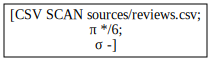

In [26]:
review_dataset_pl_lazy.show_graph()

In [27]:
review_dataset_pl_lazy_collected, collect_time = collect_transformation(review_dataset_pl_lazy)
lazy_execution_time += collect_time

[Polars] Elapsed time to collect lazy frame: 0.6155369281768799s


In [28]:
listing_dataset_pl_lazy_collected, add_column_time = add_column_eager(listing_dataset_pl_lazy_collected)
lazy_execution_time += add_column_time

[Polars] Elapsed time to add column (eager execution): 0.004706144332885742s


In [29]:
joined_dataset_pl_lazy_colledted, join_time = join_datasets_eager(listing_dataset_pl_lazy_collected, review_dataset_pl_lazy_collected,"listing_id")
lazy_execution_time += join_time

[Polars] Elapsed time to perform join (eager execution): 0.03485608100891113s


***

# Wrapping 📦

In [30]:
migrated_to_pandas, migration_time = migrate_to_pandas(joined_polars)
eager_execution_time += migration_time

[Polars] Elapsed time to perform migration (eager execution): 0.05677390098571777s


In [31]:
migrated_to_pandas, migration_time = migrate_to_pandas(joined_dataset_pl_lazy_colledted)
lazy_execution_time += migration_time

[Polars] Elapsed time to perform migration (eager execution): 0.035977840423583984s


***

# Comparatives 




In [32]:
times = [('Polars - lazy', lazy_execution_time), ('Polars - eager', eager_execution_time), ('Pandas', pandas_execution_time)]
for time in times:
    print(f'Overall execution time for {time[0]}: {time[1]}s')

Overall execution time for Polars - lazy: 0.9248208999633789s
Overall execution time for Polars - eager: 0.8556993007659912s
Overall execution time for Pandas: 4.499800205230713s
